## IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

## LOAD DATA

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

## DATA PREPROCESSING

In [3]:
data = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['species']
)
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

## FEATURE ANALYSIS

In [4]:
print("Dataset head:\n", data.head())
print("\nDataset info:\n")
data.info()


Dataset head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 no

In [5]:
print("\nStatistical summary:\n", data.describe())


Statistical summary:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


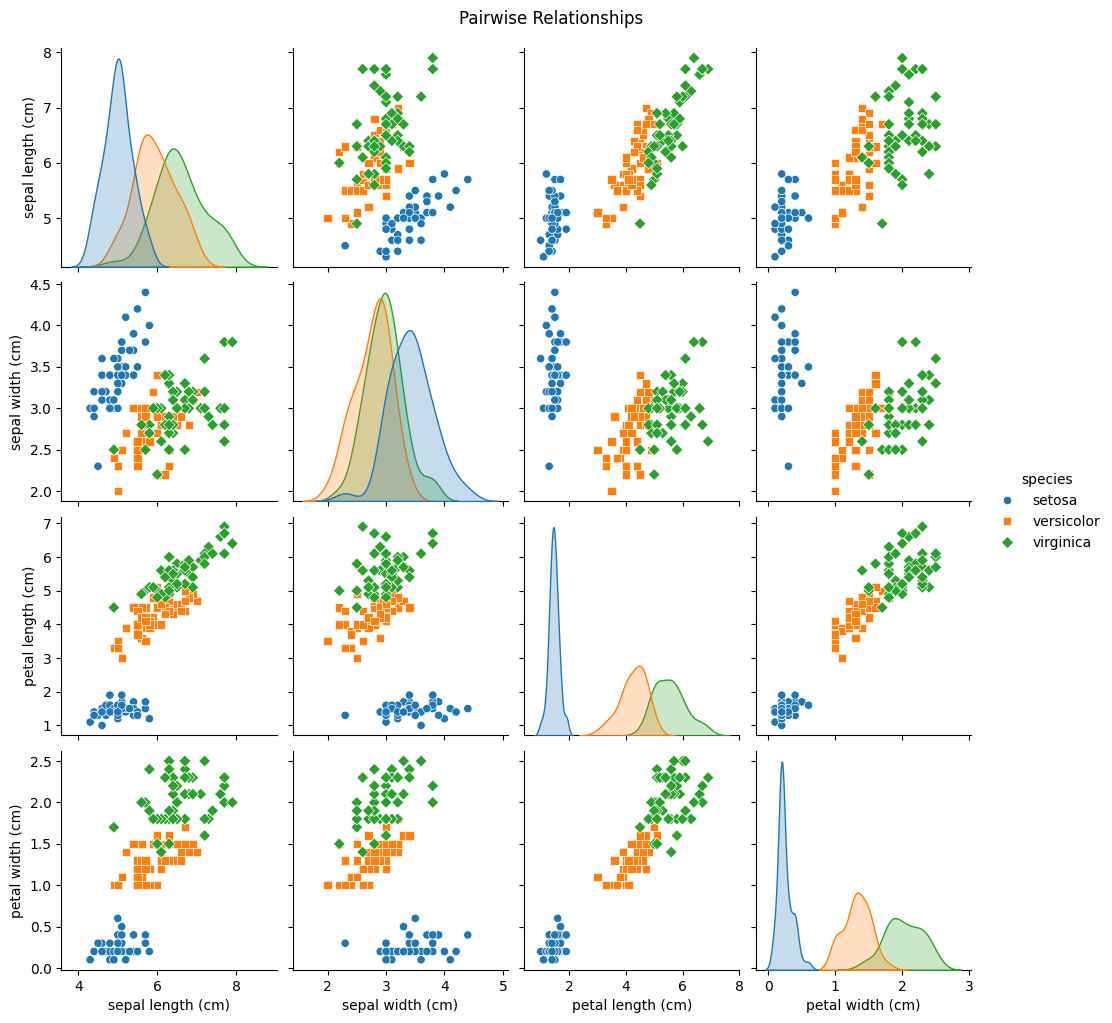

In [6]:
sns.pairplot(data, hue='species', markers=['o', 's', 'D'])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [7]:
X = data.iloc[:, :-1]
y = data['species']

In [8]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## MODELING 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## MODEL VALIDATION

In [11]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



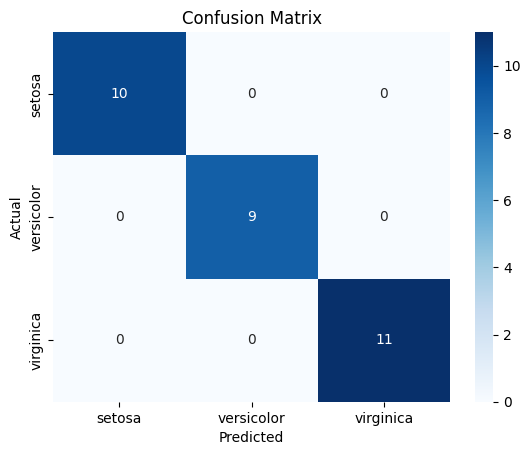

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## VISUALIZATION

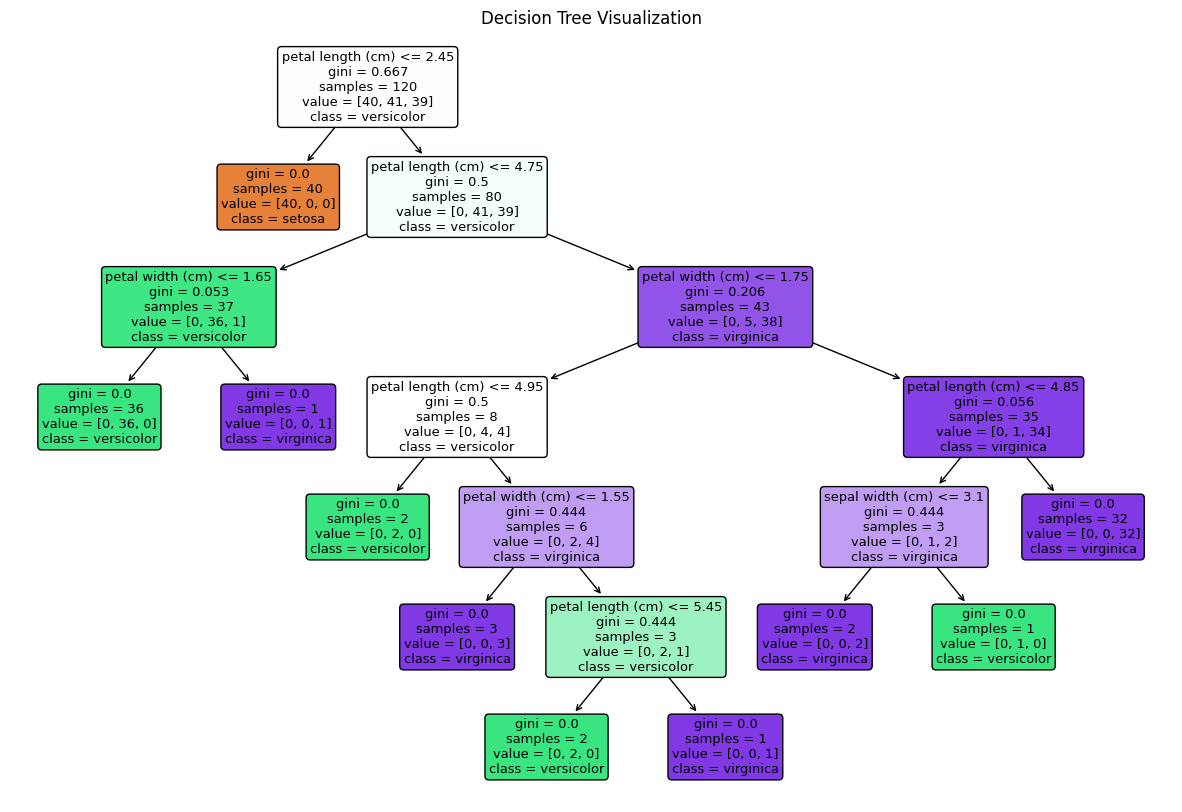

In [13]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [14]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
              Feature  Importance
2  petal length (cm)    0.906143
3   petal width (cm)    0.077186
1   sepal width (cm)    0.016670
0  sepal length (cm)    0.000000


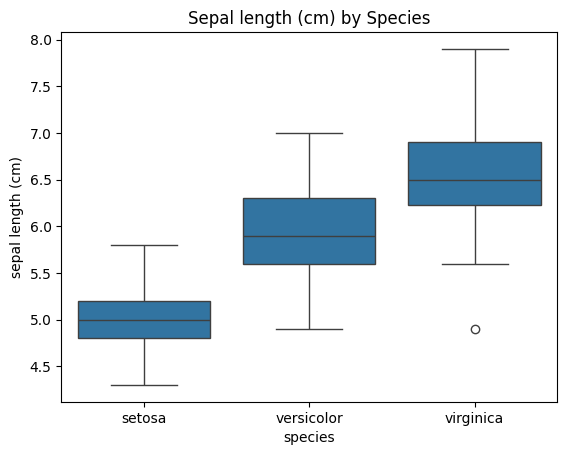

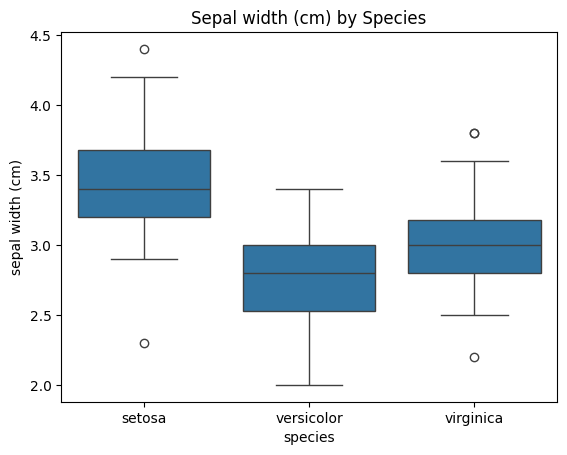

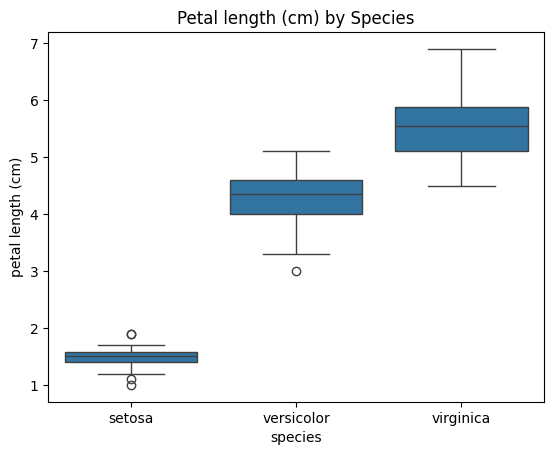

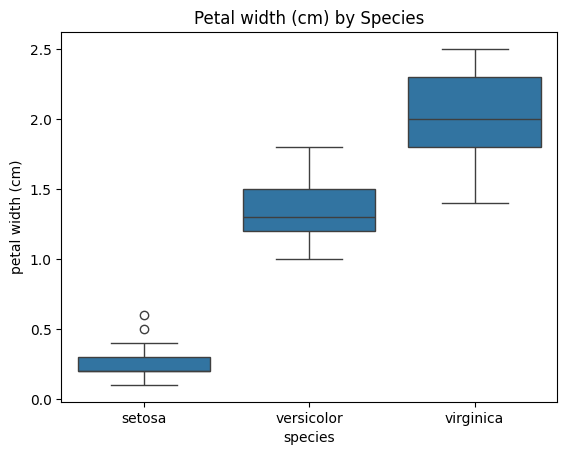

In [15]:
for feature in X.columns:
    sns.boxplot(x='species', y=feature, data=data)
    plt.title(f'{feature.capitalize()} by Species')
    plt.show()